## Dimensionality Reduction

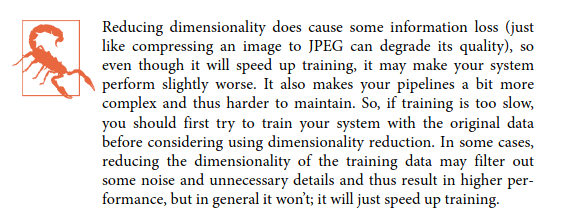

#### The more dimensions the training set has, the greater the risk of overfitting it.
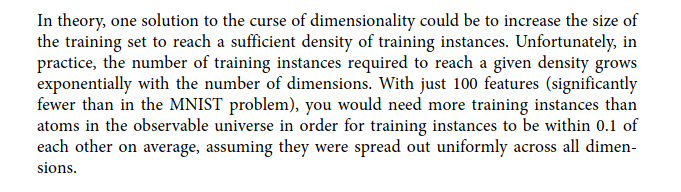

#### The technique to solve curse of dimensionality is *Projection* and *Manifold Learning*
* #### Projection is technique of projection higher dimensional space with help of its lower dimension projection, mainly hyperplane
* 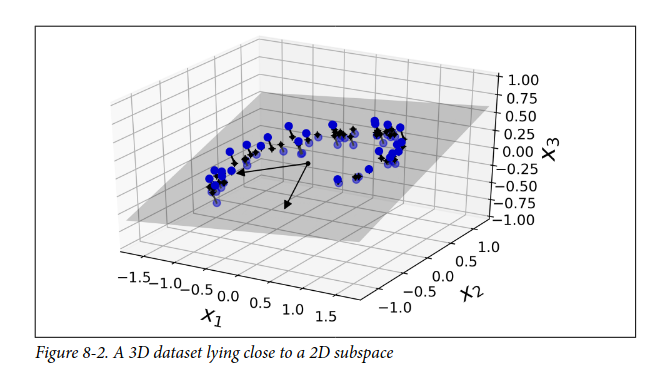 | 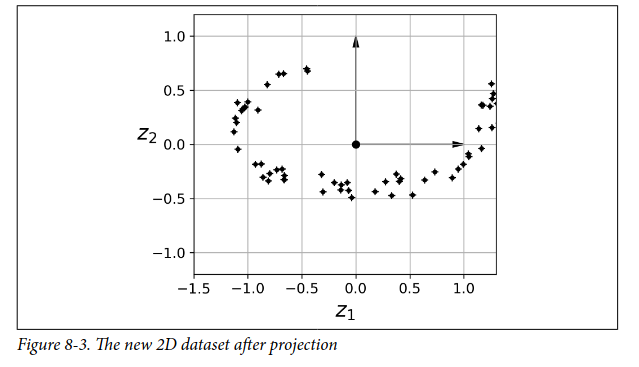

#### Manifold Learning is -
* 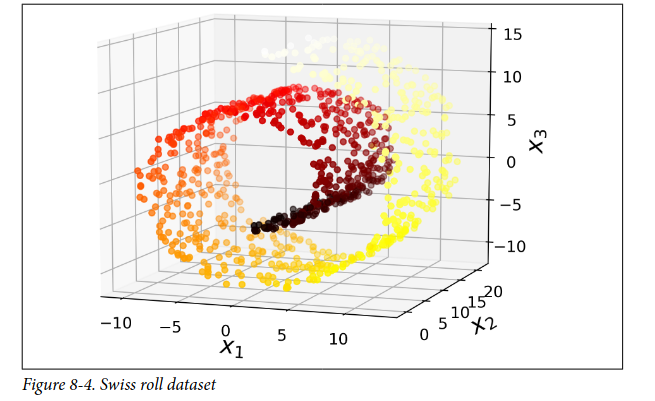
* #### A d-th Dimensional manifold can be bent or twisted to n-th Dimenstional plane(d<n) ie, d-dimensional manifold is a part of an n-dimensional space that locally resembles a d-dimensional hyperplane.
* #### It relies on the manifold assumption, also called the manifold hypothesis, which holds that most real-world high-dimensional datasets lie close to a much lower-dimensional manifold. This assumption is very often empirically observed.
* 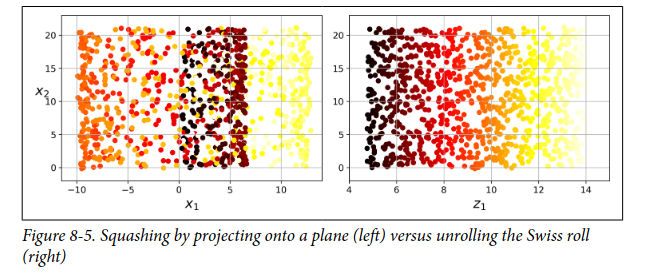
* #### It works by removing certain redundant patterns or noise but, at the end of the day, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

## PCA, Kernal PCA and LLE are 3 most popular dim reduction algos

### PCA - Principle Component Analysis
#### It works by identifying the hyperplane that lies closest to the data, and then it projects the data onto it, just like in Projection

### Working of PCA :-
   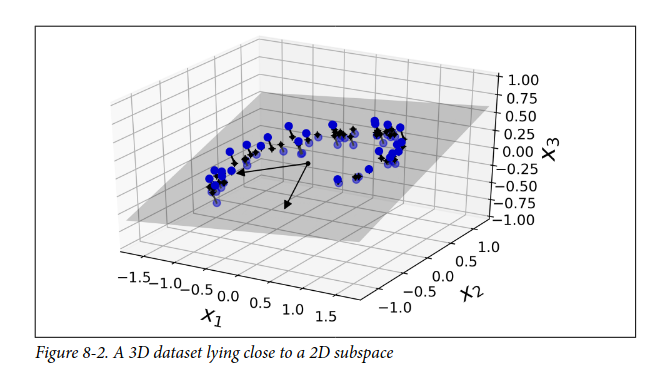 | 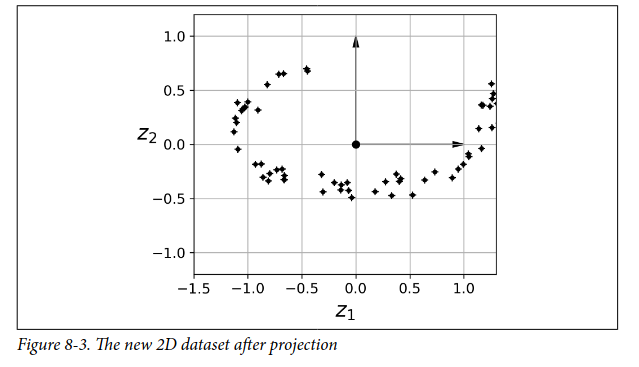
#### PCA works by preserving the variance of dataset by finding its principle components(PC) just in case of above figure, assuming data is centered in unit vector space
* #### It has 3 dim: x1, x2 & x3.. or c1,c2,c3 .... ci (ith component of data) in which maximum variance can be found in 2 dim, lower than original dim
* #### c1 & c2 are arrow while c3(projection) is orthogonal to both
* #### The unit vector will be different pair due two PC being in same plane
* #### Luckily, there is a standard matrix factorization technique, Singular Vector Decomposition (SVD)
* #### Then we reduce those PC or dims by projecting it to a hyperplane, while preserving as much variance as possible.


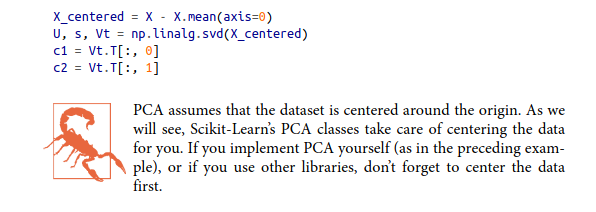 | 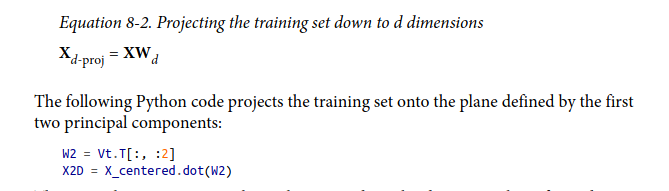

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris 

iris = load_iris()
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

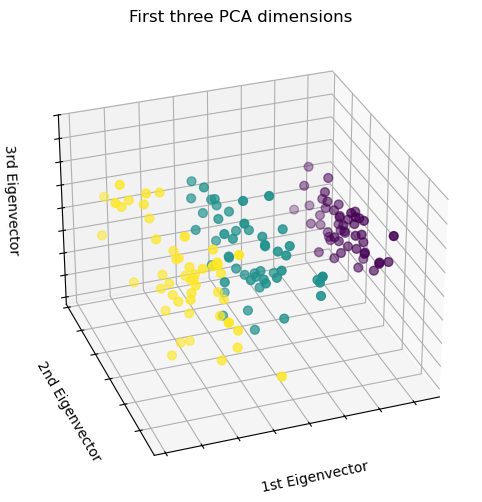

In [2]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

pca = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    pca[:, 0],
    pca[:, 1],
    pca[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [3]:
pca.explained_variance_ratio_

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

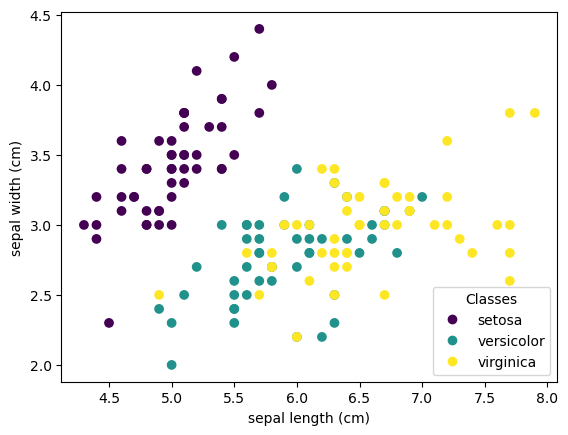

In [4]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [3]:
pca = PCA().fit(iris.data)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

In [6]:
pca = PCA(n_components=0.95) # instead of no. of PC we set it to float between 0.0 and 1.0, indicating the ratio of variance 
X_reduced = pca.fit_transform(iris.data)

#### There is a Elbow Curve during dimensionality reduction indicating reducing data further will give little information
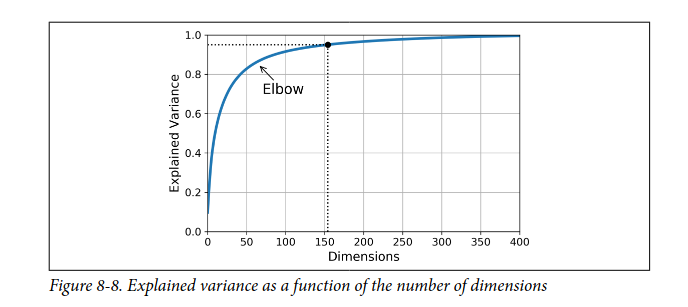


#### Applying Kernal PCA (kPCA)
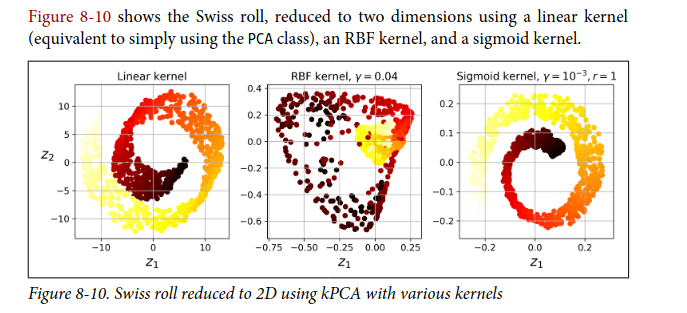

In [4]:
X = iris.data
y = iris.target

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline

clf = Pipeline([
("kpca", KernelPCA(n_components=2)),
("log_reg", LogisticRegression())
])

param_grid = [{
"kpca__gamma": np.linspace(0.03, 0.05, 10),
"kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [6]:
print(grid_search.best_params_, grid_search.best_score_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'} 0.9066666666666667


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform(X_test)

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_reduced = rbf_pca.fit_transform(X_scaled)
# X_test_reduced = rbf_pca.transform(X_test_scaled)

In [29]:
from sklearn import metrics
 
clf = LogisticRegression().fit(X_reduced,y)
predicted = clf.predict(X_reduced)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y, predicted)}\n"
)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.82      0.74      0.78        50
           2       0.76      0.84      0.80        50

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150




### PCA For Compression

* #### We can preserve 95% of variance of MNIST dataset with 150 features instead of original 784 features, data is now 80% compressed.
* #### And you can see how this size reduction can speed up a classification algorithm (such as SVM classifier) tremendously.
* #### It is also possible to decompress reduced data into 784 features(won't be exact same since we lost 5% of data) with below code
* #### The mean squared distance between the original data and the reconstructed data (compressed and then decompressed) is called the reconstruction error.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split


In [2]:
digits_train = pd.read_csv('train/fashion-mnist_train.csv')
digits_test = pd.read_csv('test/fashion-mnist_test.csv')

In [3]:
# Split into features and labels
X_train, y_train = digits_train.iloc[:, 1:], digits_train.iloc[:, 0]
X_test, y_test = digits_test.iloc[:, 1:], digits_test.iloc[:, 0]

# Optionally view shape or data
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [5]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

### Applying PCA to reduce training time, apply with Standardization

In [4]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.98) + 1
d

349

In [21]:
X_train_reduced.shape

(60000, 154)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=200)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)


### Incremental PCA - for large dataset with many features

In [8]:
from sklearn.decomposition import IncrementalPCA

    n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

/home/krrish/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
import time
from sklearn.svm import SVC

start = time.time()
# Use only 10,000 samples for training
sample_size = 11000
X_small = X_train_reduced[:sample_size]
y_small = y_train[:sample_size]
# X_small = X_train_reduced
# y_small = y_train

clf = SVC(gamma=0.001)
clf.fit(X_small, y_small)

end = time.time()
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test_reduced)
total_time = end-start
print(
    f"Classification report for classifier {clf.__class__.__name__}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    f"Total time taken to train: {total_time}"
)

#### Both SVC and PCA works better with standardized data

In [7]:
from sklearn import metrics

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.77      0.79      1000
           3       0.84      0.92      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.95      0.91      0.93      1000
           6       0.67      0.59      0.63      1000
           7       0.90      0.91      0.91      1000
           8       0.94      0.97      0.96      1000
           9       0.91      0.94      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000




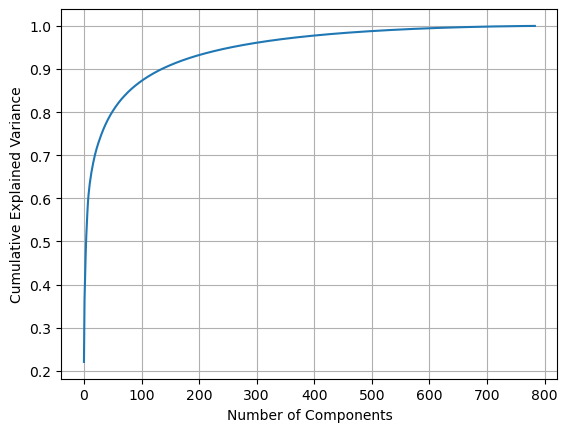

In [25]:
import matplotlib.pyplot as plt

pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


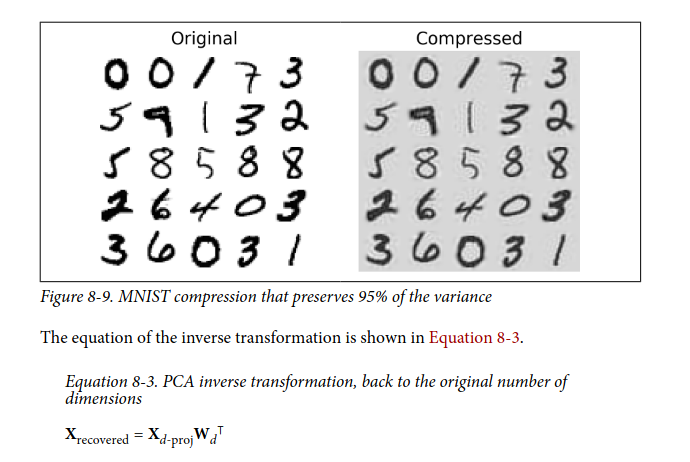

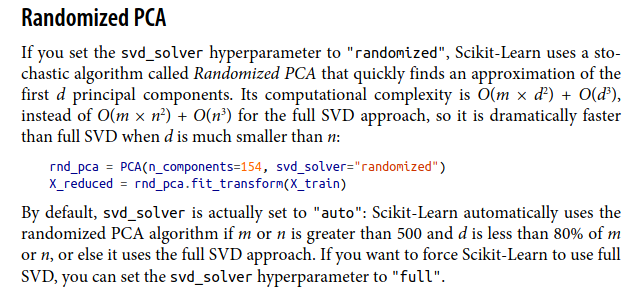

## Locally Linear Embeddings (LLE)

* #### It is a powerful nonlinear dimensionality reduction (NLDR) technique.
* #### It is a Manifold Learning technique that does not rely on projections, like the previous algorithms do.
* #### It scale poorly to very large datasets.
* #### LLE works by first measuring how each training instance linearly relates to its closest neighbors (c.n.), and then looking for a low-dimensional representation of the training set where these local relationships are best preserved
* #### Complexity -
   - #### 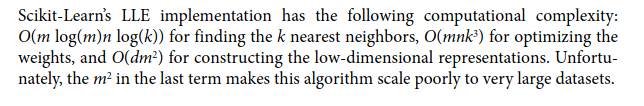

Working of LLE
---
It works by solving two Linear Programming problem(LPP)

   - Finding best weights(in linearity) and normalizing them from each training instance with variable w
   - Encoding linear relation betn training instance in a Weight Matrix
   - Map those training instance in lower dimension while preserving local relation and variable z 
* 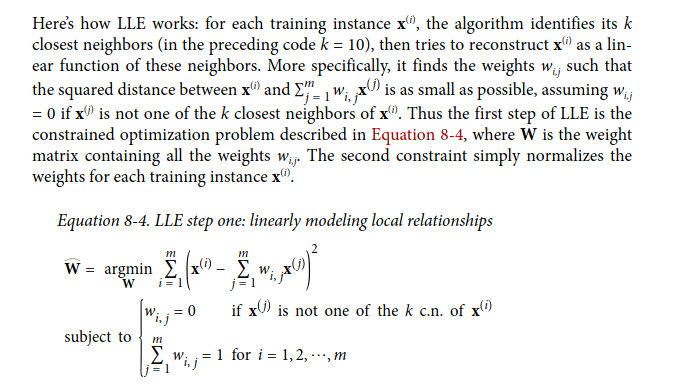 | 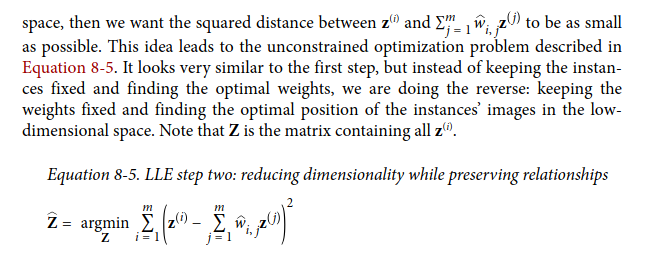 | 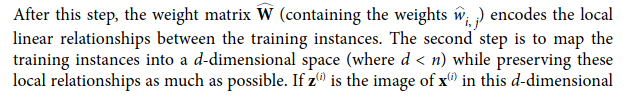 | 

In [7]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

In [8]:
from sklearn import metrics
 
clf = LogisticRegression().fit(X_reduced,y)
predicted = clf.predict(X_reduced)
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y, predicted)}\n"
)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.81      0.94      0.87        50
           2       0.93      0.78      0.85        50

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150




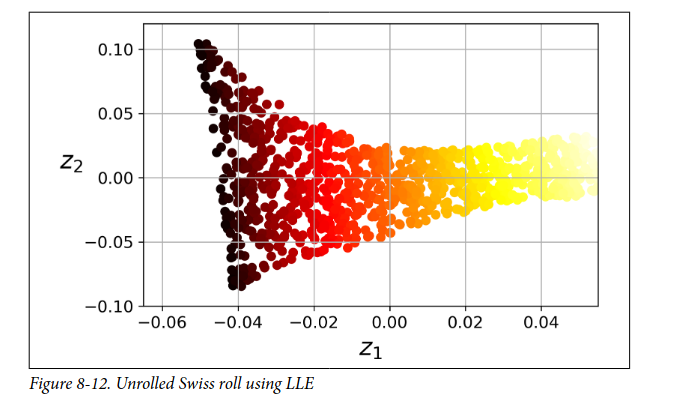

### Other Dimensionality Reduction Techniques are -

-  Random Projection
-  Multi-dimensional Scaling (MDS)
-  IsoMap
-  t-Distributed Stochastic Neighbor Embedding (t-SNE)
-  Linear Discriminant Analysis (LDA)
-  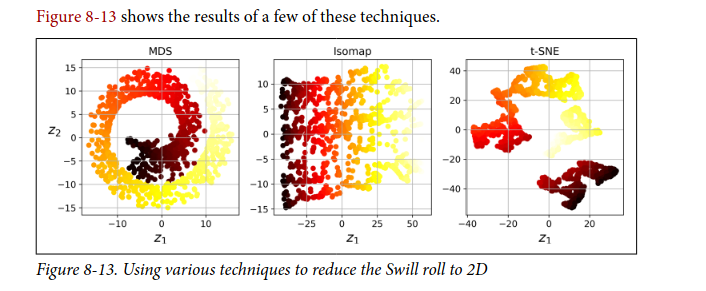